### 동아 일보 데이터크롤러

```
Arguments : query_word, (period)

return : title_list, category_list, body_list
```

In [1]:
import requests
from bs4 import BeautifulSoup

In [3]:
def body_extractor(link):
    soup = BeautifulSoup(requests.get(link).content, 'html.parser')
    
    text = ""    
    for con in soup.select_one(".article_txt").contents:
        try:
            con.text
            continue
        except :
            if con == "\ufeff【서울=뉴시스】":
                continue
            text += " " + con
    return text.strip()

def doonga_crawler(query, period=None):
    
    # data containers 
    titles = []
    links = []
    categories = []
    dates = []
    bodies = []
    
    i = 1 
    nobody = 0
    
    while True:
        try:
            
            print("-" * 30)
            print('{} page is start'.format(i//15 + 1))

            url = "http://news.donga.com/search?p={}&query={}&check_news=1&more=1&sorting=1&search_date=1&v1=&v2=&range=1".format(i, query)
            res = requests.get(url)
            soup = BeautifulSoup(res.content, 'html.parser')

            if len(soup.select('p.tit')) == 0:
                print('***** no result! *****')
                break

            for art, cate, da in zip(soup.select("p.tit > a"), soup.select(".loc"), soup.select("p.tit > span")):

                title = art.text
                if len(title) == 0:
                    nobody += 1
                    continue

                link = art["href"]
                if len(link) == 0:
                    nobody += 1
                    continue

                category = cate.text
                if len(category) == 0:
                    category = 'unknown_category'

                date = da.text
                if len(date) == 0:
                    date = "unknown_date"

                try:
                    body = body_extractor(link)
                    if len(body) == 0:
                        print("no body")
                        nobody += 1
                        continue

                except Exception as ex:
                    print(ex)
                    nobody += 1
                    continue
                    
                titles.append(title)
                links.append(link)
                categories.append(category) 
                dates.append(date)
                bodies.append(body)

            print('{} page is done'.format(i//15 + 1))
            i += 15
        
        except:
            print("**"*30)
            print("wait.....")
            print("**"*30)
            sleep(5)
            continue
            
    return [titles, links, categories, dates, bodies], nobody

#### 미세먼지

In [4]:
data_dust, nobody_dust = doonga_crawler('미세먼지')

------------------------------
1 page is start
[날씨] 오늘 낮은 포근 남부엔 비…수도권 미세먼지 ‘나쁨’
바이오기업 오상자이엘, 미세먼지 차단 특허 획득 
고래는 어디로 갈까[고양이 눈] 
건조 기술로 알아본 트롬 건조기가 선택받는 이유 
[날씨]22일 출근길 덜 춥다…새벽 제주·전남부터 비 확대
與, 2월 임시국회 추진…“개의 가부 조만간 결정될 것”
가난했던 나라에서 K-pop 확산하는 곳으로…2120년 한국의 미래는?
[날씨]수도권 출근길 영하 5~6도…일부 미세먼지 기승
no body
“폐기물 정책 바꿔야… 제품 생산때부터 자원순환 고려를” 
종량제 봉투속에 비닐-플라스틱 꽉꽉… “쓰레기 30%가 포장재” 
[단독]‘매일 43만t’ 우리가 쌓은 쓰레기 산 
르노삼성, 유상 정비 프로모션 진행…‘에어컨필터’ 할인 혜택
국외 미세먼지 확인해줄 ‘천리안위성 2B호’ 발사 준비 “이상무”
래미안 루센티아, 실외 미세먼지 저감설비 적용
1 page is done
------------------------------
2 page is start
[날씨] 20일 절기상 ‘대한’…일교차 크고 미세먼지 ‘나쁨’
까다로운 소비자들도 인정한 취향저격! 삼성 에어드레서 
반짝추위 풀리자… 또 초미세먼지 공습 
미세먼지에 갇혔던 중부·서남부…20일도 전국 미세먼지 기승
[날씨]20일 절기상 ‘대한’…일부 지역 눈 또는 비
호주 산불의 불똥? 입 모은 엘롯두, “걱정 없다”
************************************************************
wait.....
************************************************************


NameError: name 'sleep' is not defined

In [4]:
nobody_dust

302

In [5]:
import pandas as pd

df = pd.DataFrame()

df["title"] = data_dust[0]
df["link"] = data_dust[1]
df["category"] = data_dust[2]
df["date"] = data_dust[3]
df["body"] = data_dust[4]
df

,title,link,category,date,body
0,"[리뷰] 매일 피로한 눈을 위한 선택, 벤큐 GW2480T 아이케어",http://news.donga.com/3/all/20190626/96198804/1,동아닷컴 > IT/과학,2019-06-26 16:54,"눈은 쉽게 피로해지는 기관이지만, 하루 중 제대로 눈이 쉬는 시간은 취침 때 정도다..."
1,내 차 배출가스 등급은?…7월 1일부터 114-인터넷 통해 확인 가능,http://news.donga.com/3/all/20190626/96198851/1,동아일보 > 사회 | 김호경 기자,2019-06-26 16:54,다음 달 1일부터 모든 운전자들은 114나 인터넷을 통해 소유 차량의 배출가스 등급...
2,“대기오염이 여성 난소활동 저하시켜” 伊연구결과,http://news.donga.com/3/all/20190626/96189514/1,뉴시스 > 국제,2019-06-26 10:49,대기 오염이 여성들의 난소 활동을 저하시킨다는 연구 결과가 나왔다고 영국 가디언이 ...
3,[날씨] 장맛비 27일 오후에 대부분 그쳐…지리산 시간당 20㎜ 큰비,http://news.donga.com/3/all/20190626/96187317/1,뉴스1 > 사회,2019-06-26 09:11,목요일인 27일은 전날부터 시작된 장맛비가 전국적으로 계속 이어진다. 기상청은 이날...
4,올해 첫 장맛비… 제주도부터 전국으로 확대,http://news.donga.com/3/all/20190626/96186511/1,뉴스1 > 사회,2019-06-26 07:21,수요일인 26일은 폭염특보의 영향으로 중부지방에 무더위가 계속되는 가운데 남부지방과...
5,100평대 숲속 쉼터-산소방 등 갖춘 한·양방 ‘소람한방병원’ 신관 오픈,http://news.donga.com/3/all/20190625/96175189/1,동아일보 > IT/과학 | 김민식 기자,2019-06-26 03:00,한·양방 통합 면역암 치료를 시행하고 있는 소람한방병원(병원장 성신)이 10일 서울...
6,"‘家電명가’ LG전자, 대한민국 세탁기의 ‘반세기 역사’ 썼다",http://news.donga.com/3/all/20190625/96176342/1,동아일보 > 경제 | 박정민 기자,2019-06-26 03:00,최근 LG전자가 세탁기 사업 50주년을 맞아 선보인 ‘한국인의 세탁’이라는 제목의 ...
7,[날씨] 26일 수도권 폭염특보 낮 33도…제주·남부 첫 장맛비,http://news.donga.com/3/all/20190625/96180784/1,뉴스1 > 사회,2019-06-25 18:23,수요일인 26일은 폭염특보의 영향으로 중부지방에 무더위가 계속되는 가운데 남부지방과...
8,[날씨]26일 제주·남부부터 장마 시작…밤 전국 비소식,http://news.donga.com/3/all/20190625/96179777/1,뉴시스 > 사회,2019-06-25 17:32,26일 북상하는 장마전선의 영향으로 제주와 남부 지방에서 비가 오기 시작해 밤에 전...
9,"반도건설, ‘운서역 반도유보라’ 분양 돌입",http://news.donga.com/3/all/20190625/96174948/2,경제뉴스 > 경제 | 동아닷컴 정진수 기자,2019-06-25 14:28,반도건설은 인천 중구 운서역세권에 들어서는 주상복합 아파트 ‘운서역 반도유보라’ 분...


##### 1st 시도
-  page : 253
-  nobody_dust : 59

##### 2nd 시도

- page : 861
- Memory error

In [6]:
import pickle 

with open('doonga_dust.pkl', "wb") as f:
    pickle.dump(df, f)

In [7]:
with open('doonga_dust.pkl', "rb") as f:
    sla = pickle.load(f)

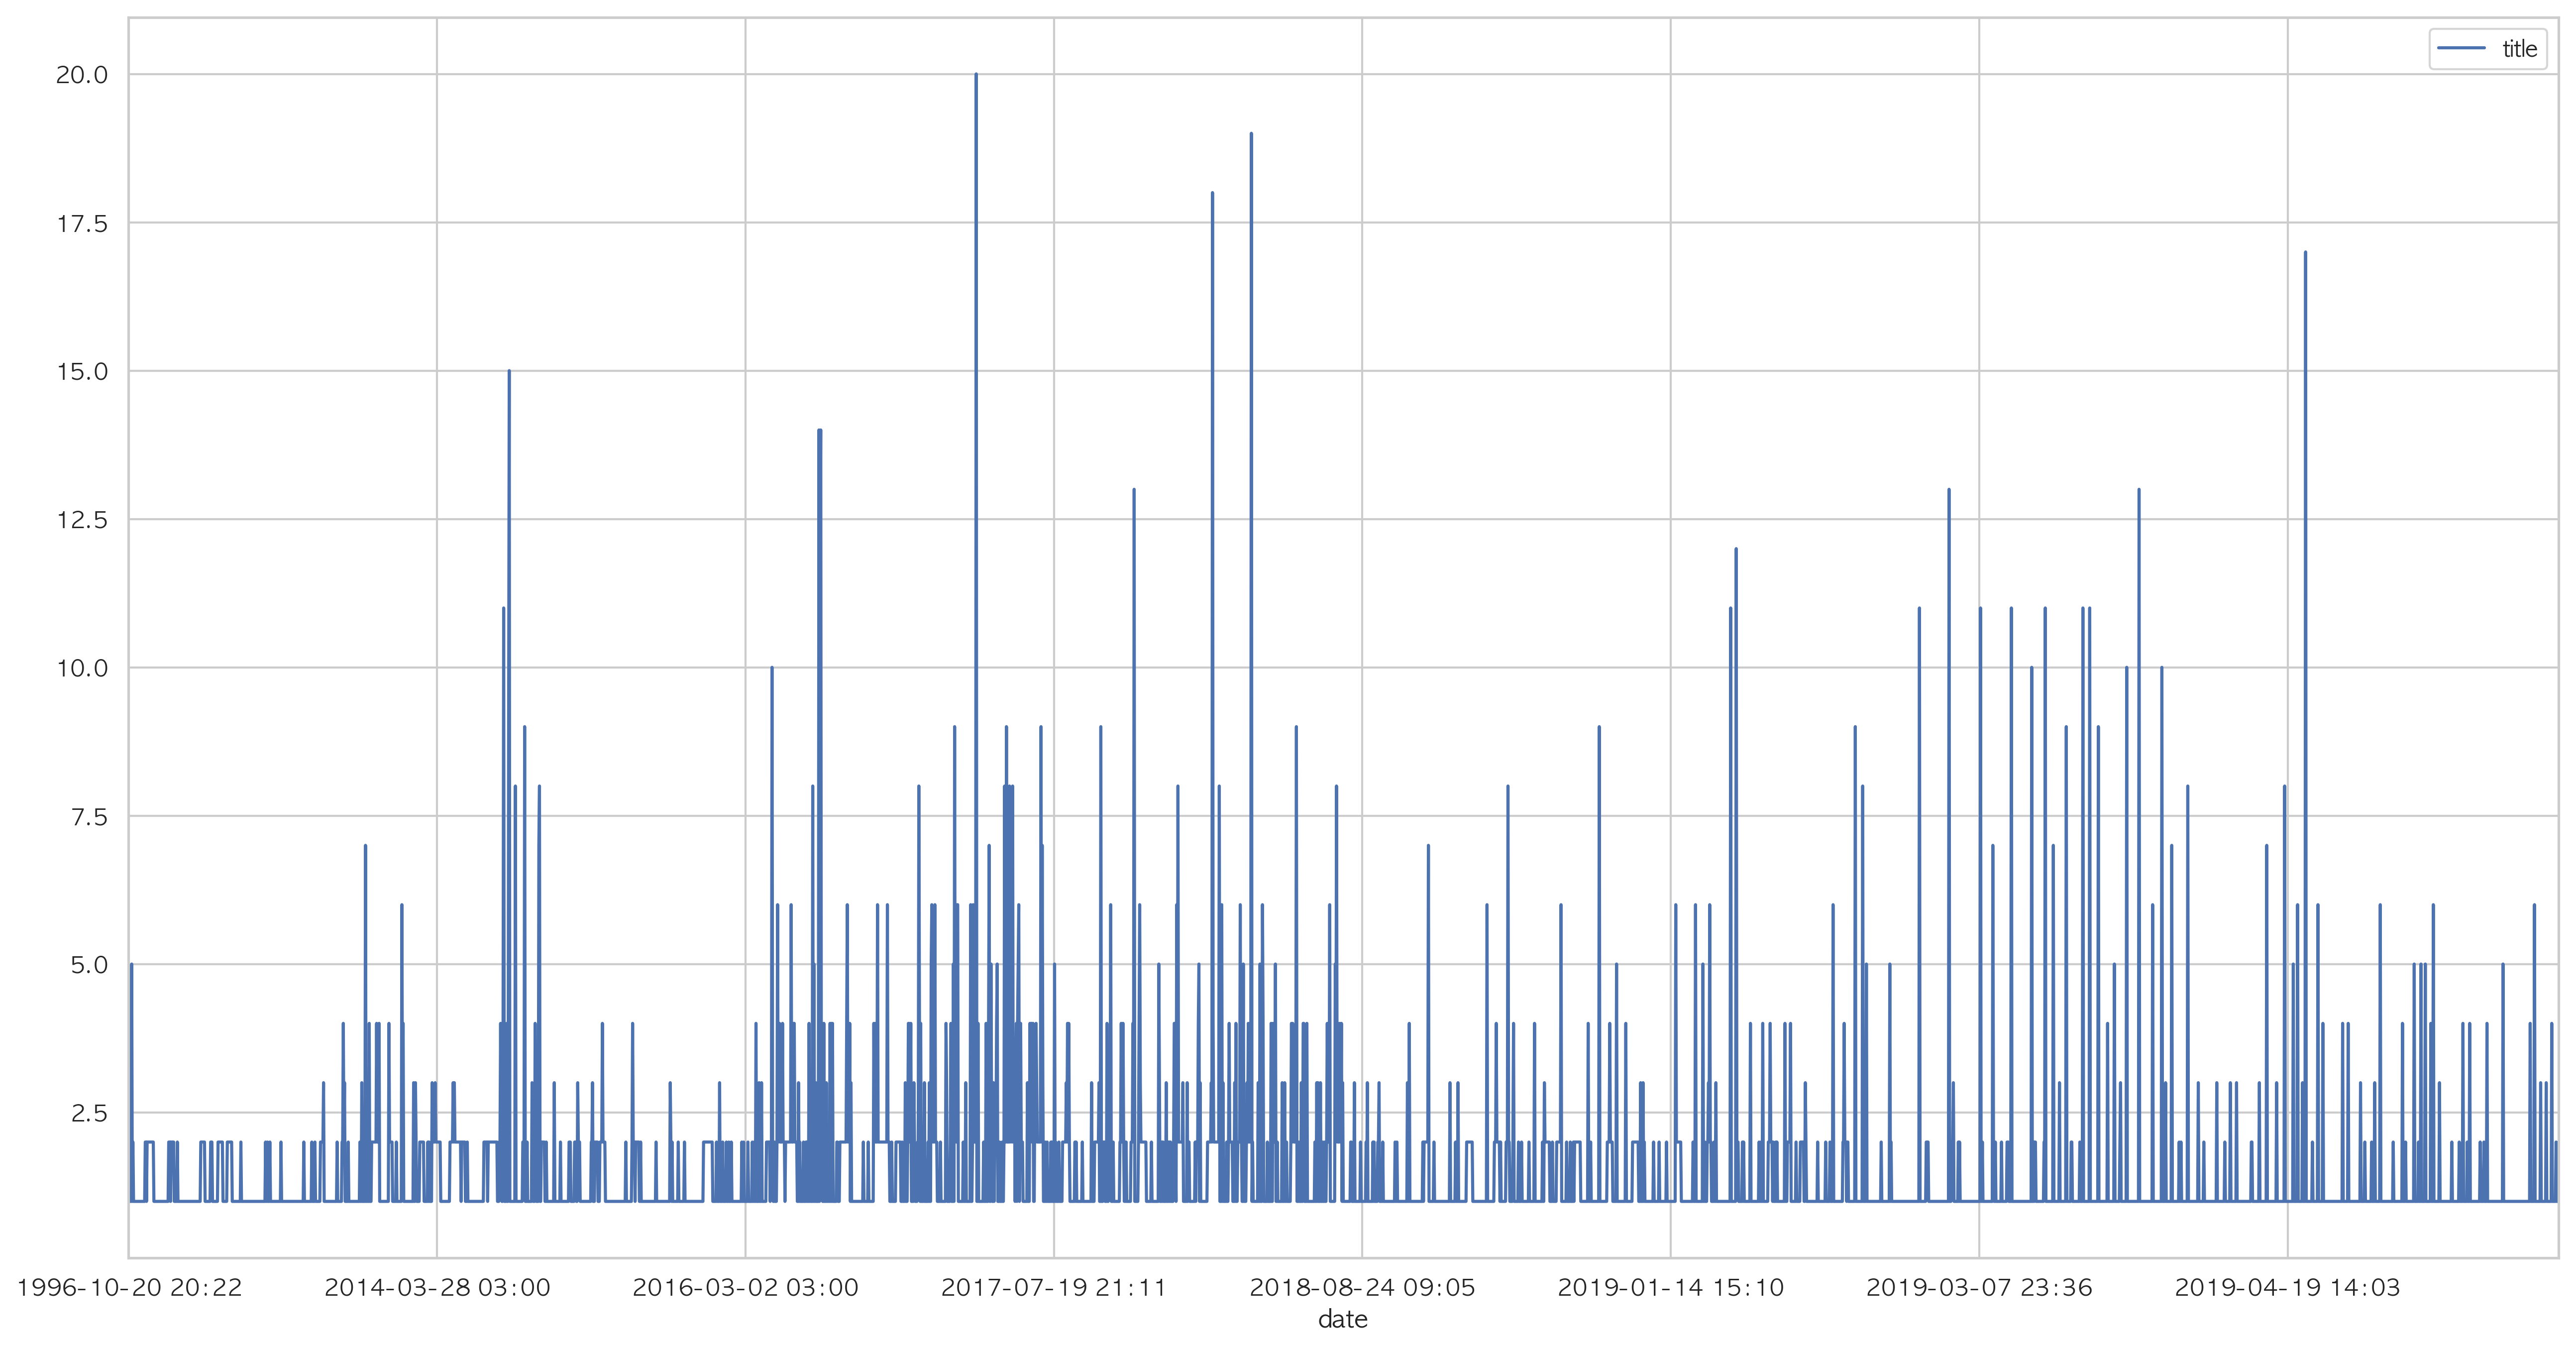

In [8]:
fig, ax = plt.subplots(1,1,figsize=(21, 11))
sla.groupby(by='date').count().plot(y="title", ax=ax)

#### 노인

In [9]:
data_elder, nobody_elder = doonga_crawler('미세먼지')

------------------------------
1 page is start
1 page is done
------------------------------
2 page is start
no body
2 page is done
------------------------------
3 page is start
3 page is done
------------------------------
4 page is start
4 page is done
------------------------------
5 page is start
5 page is done
------------------------------
6 page is start
no body
6 page is done
------------------------------
7 page is start
no body
7 page is done
------------------------------
8 page is start
8 page is done
------------------------------
9 page is start
9 page is done
------------------------------
10 page is start
HTTPConnectionPool(host='www.donga.com', port=80): Max retries exceeded with url: /news/3/all/20190604/95835035/1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1c22008fd0>: Failed to establish a new connection: [Errno 60] Operation timed out',))
10 page is done
------------------------------
11 page is start
11 page is done
------------

119 page is done
------------------------------
120 page is start
120 page is done
------------------------------
121 page is start
no body
121 page is done
------------------------------
122 page is start
122 page is done
------------------------------
123 page is start
123 page is done
------------------------------
124 page is start
124 page is done
------------------------------
125 page is start
125 page is done
------------------------------
126 page is start
126 page is done
------------------------------
127 page is start
no body
127 page is done
------------------------------
128 page is start
no body
128 page is done
------------------------------
129 page is start
no body
129 page is done
------------------------------
130 page is start
130 page is done
------------------------------
131 page is start
131 page is done
------------------------------
132 page is start
132 page is done
------------------------------
133 page is start
133 page is done
---------------------------

222 page is done
------------------------------
223 page is start
223 page is done
------------------------------
224 page is start
224 page is done
------------------------------
225 page is start
225 page is done
------------------------------
226 page is start
226 page is done
------------------------------
227 page is start
227 page is done
------------------------------
228 page is start
228 page is done
------------------------------
229 page is start
229 page is done
------------------------------
230 page is start
230 page is done
------------------------------
231 page is start
231 page is done
------------------------------
232 page is start
232 page is done
------------------------------
233 page is start
233 page is done
------------------------------
234 page is start
234 page is done
------------------------------
235 page is start
235 page is done
------------------------------
236 page is start
236 page is done
------------------------------
237 page is start
237 page i

344 page is done
------------------------------
345 page is start
345 page is done
------------------------------
346 page is start
346 page is done
------------------------------
347 page is start
347 page is done
------------------------------
348 page is start
348 page is done
------------------------------
349 page is start
349 page is done
------------------------------
350 page is start
350 page is done
------------------------------
351 page is start
351 page is done
------------------------------
352 page is start
352 page is done
------------------------------
353 page is start
353 page is done
------------------------------
354 page is start
354 page is done
------------------------------
355 page is start
355 page is done
------------------------------
356 page is start
356 page is done
------------------------------
357 page is start
no body
no body
357 page is done
------------------------------
358 page is start
358 page is done
------------------------------
359 page is 

In [10]:
import pandas as pd

df = pd.DataFrame()

df["title"] = data_elder[0]
df["link"] = data_elder[1]
df["category"] = data_elder[2]
df["date"] = data_elder[3]
df["body"] = data_elder[4]
df

,title,link,category,date,body
0,내 차 배출가스 등급은?…7월 1일부터 114-인터넷 통해 확인 가능,http://news.donga.com/3/all/20190626/96198851/1,동아일보 > 사회 | 김호경 기자,2019-06-26 16:54,다음 달 1일부터 모든 운전자들은 114나 인터넷을 통해 소유 차량의 배출가스 등급...
1,"[리뷰] 매일 피로한 눈을 위한 선택, 벤큐 GW2480T 아이케어",http://news.donga.com/3/all/20190626/96198804/1,동아닷컴 > IT/과학,2019-06-26 16:54,"눈은 쉽게 피로해지는 기관이지만, 하루 중 제대로 눈이 쉬는 시간은 취침 때 정도다..."
2,“대기오염이 여성 난소활동 저하시켜” 伊연구결과,http://news.donga.com/3/all/20190626/96189514/1,뉴시스 > 국제,2019-06-26 10:49,대기 오염이 여성들의 난소 활동을 저하시킨다는 연구 결과가 나왔다고 영국 가디언이 ...
3,[날씨] 장맛비 27일 오후에 대부분 그쳐…지리산 시간당 20㎜ 큰비,http://news.donga.com/3/all/20190626/96187317/1,뉴스1 > 사회,2019-06-26 09:11,목요일인 27일은 전날부터 시작된 장맛비가 전국적으로 계속 이어진다. 기상청은 이날...
4,올해 첫 장맛비… 제주도부터 전국으로 확대,http://news.donga.com/3/all/20190626/96186511/1,뉴스1 > 사회,2019-06-26 07:21,수요일인 26일은 폭염특보의 영향으로 중부지방에 무더위가 계속되는 가운데 남부지방과...
5,100평대 숲속 쉼터-산소방 등 갖춘 한·양방 ‘소람한방병원’ 신관 오픈,http://news.donga.com/3/all/20190625/96175189/1,동아일보 > IT/과학 | 김민식 기자,2019-06-26 03:00,한·양방 통합 면역암 치료를 시행하고 있는 소람한방병원(병원장 성신)이 10일 서울...
6,"‘家電명가’ LG전자, 대한민국 세탁기의 ‘반세기 역사’ 썼다",http://news.donga.com/3/all/20190625/96176342/1,동아일보 > 경제 | 박정민 기자,2019-06-26 03:00,최근 LG전자가 세탁기 사업 50주년을 맞아 선보인 ‘한국인의 세탁’이라는 제목의 ...
7,[날씨] 26일 수도권 폭염특보 낮 33도…제주·남부 첫 장맛비,http://news.donga.com/3/all/20190625/96180784/1,뉴스1 > 사회,2019-06-25 18:23,수요일인 26일은 폭염특보의 영향으로 중부지방에 무더위가 계속되는 가운데 남부지방과...
8,[날씨]26일 제주·남부부터 장마 시작…밤 전국 비소식,http://news.donga.com/3/all/20190625/96179777/1,뉴시스 > 사회,2019-06-25 17:32,26일 북상하는 장마전선의 영향으로 제주와 남부 지방에서 비가 오기 시작해 밤에 전...
9,"반도건설, ‘운서역 반도유보라’ 분양 돌입",http://news.donga.com/3/all/20190625/96174948/2,경제뉴스 > 경제 | 동아닷컴 정진수 기자,2019-06-25 14:28,반도건설은 인천 중구 운서역세권에 들어서는 주상복합 아파트 ‘운서역 반도유보라’ 분...


In [11]:
import pickle 

with open('doonga_elder.pkl', "wb") as f:
    pickle.dump(df, f)

In [12]:
with open('doonga_elder.pkl', "rb") as f:
    sla = pickle.load(f)

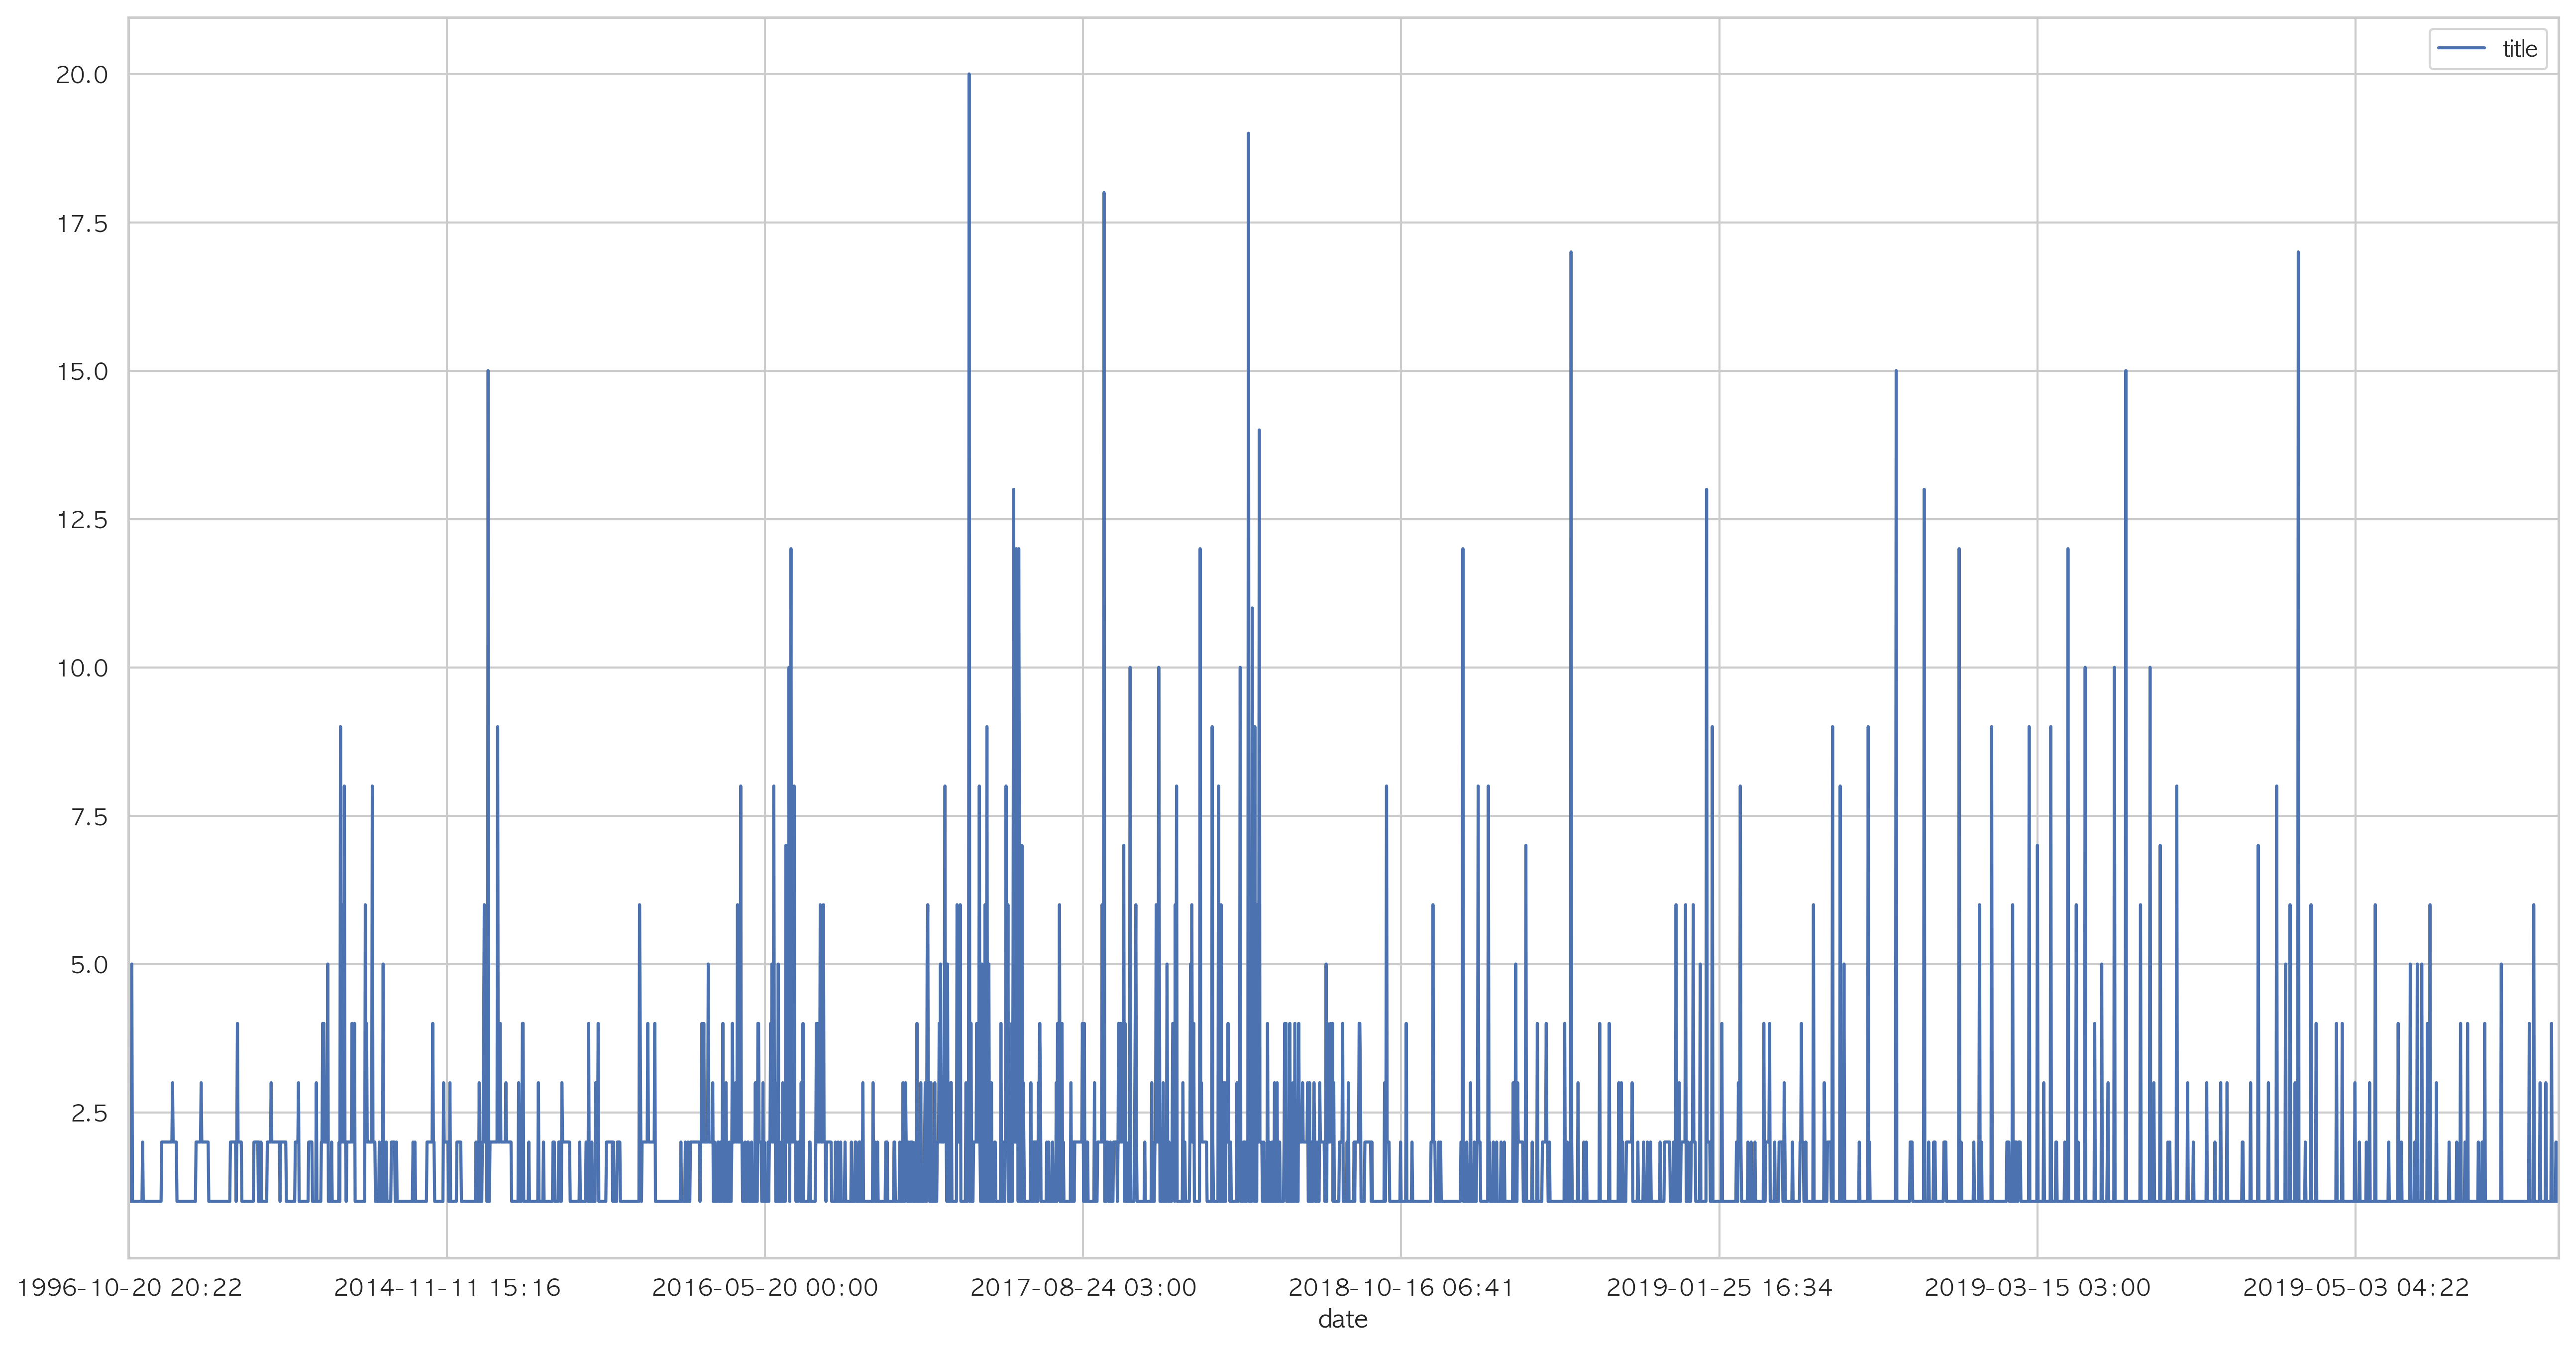

In [13]:
fig, ax = plt.subplots(1,1,figsize=(21, 11))
sla.groupby(by='date').count().plot(y="title", ax=ax)